In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast

df = pd.read_csv(r'C:\Users\rsrcy\OneDrive\Desktop\ChayanPersonal\VSC\DA with Python\JobPosting_Project\data_jobs.csv')
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

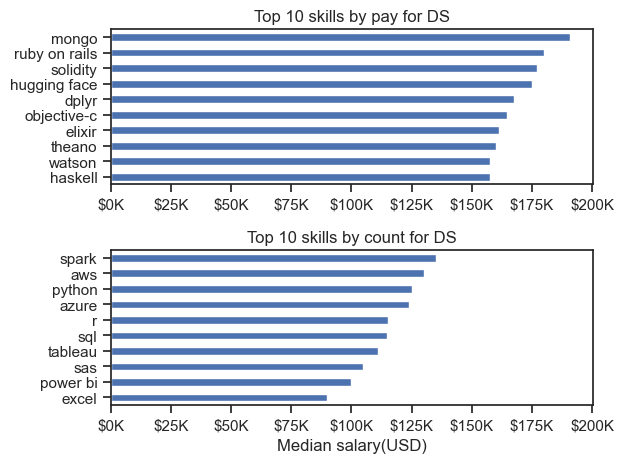

In [29]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_Ind_US = df[((df['job_country']=='India') | (df['job_country']=='United States')) & (df['job_title_short'].isin(job_titles))].copy()

df_Ind_US = df_Ind_US.dropna(subset=['salary_year_avg'])

df_Ind_US = df_Ind_US.explode('job_skills')

df_top_pay = df_Ind_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).round(0).sort_values(by='median', ascending=False)
df_top_pay = df_top_pay.head(10)

df_top_skill = df_Ind_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).round(0).sort_values(by='count', ascending=False)
df_top_skill = df_top_skill.head(10).sort_values(by='median', ascending=False)

fig, ax = plt.subplots(2,1)

df_top_pay[::-1].plot(kind='barh', y='median',ax=ax[0], legend=False)
ax[0].set_title('Top 10 skills by pay for DS')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

df_top_skill[::-1].plot(kind='barh', y='median' ,ax=ax[1], legend=False)
ax[1].set_title('Top 10 skills by count for DS')
ax[1].set_xlabel('Median salary(USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()
plt.show()

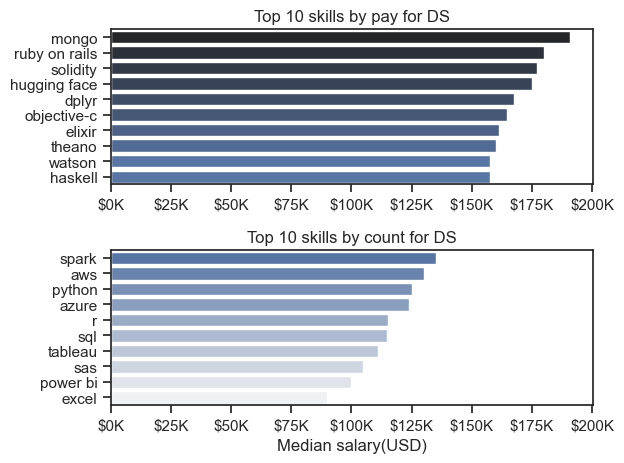

In [30]:
fig, ax = plt.subplots(2,1)

#df_top_pay[::-1].plot(kind='barh', y='median',ax=ax[0], legend=False)
sns.barplot(data=df_top_pay, x='median', y=df_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r', dodge=False)
sns.set_theme(style='ticks')
ax[0].set_title('Top 10 skills by pay for DS')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend().remove()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

#df_top_skill[::-1].plot(kind='barh', y='median' ,ax=ax[1], legend=False)
sns.barplot(data=df_top_skill, x='median', y=df_top_skill.index, ax=ax[1], hue='median', palette='light:b', dodge=False)
sns.set_theme(style='ticks')
ax[1].set_title('Top 10 skills by count for DS')
ax[1].set_xlabel('Median salary(USD)')
ax[1].set_ylabel('')
ax[1].legend().remove()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()
plt.show()

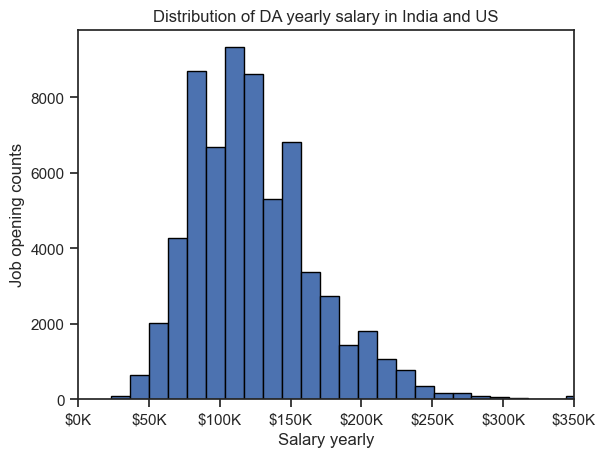

In [ ]:
df_Ind_US['salary_year_avg'].plot(kind='hist', bins=70, edgecolor='black')
plt.xlim(0,350000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
plt.title('Distribution of DS yearly salary in India and US')
plt.xlabel('Salary yearly')
plt.ylabel('Job opening counts')
plt.show()

c:\Users\rsrcy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


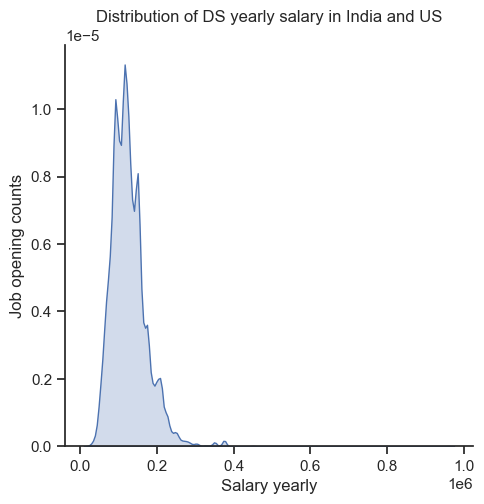

In [32]:
sns.displot(data=df_Ind_US['salary_year_avg'], kind='kde', fill=True)
sns.set_theme(style='ticks')
plt.title('Distribution of DS yearly salary in India and US')
plt.xlabel('Salary yearly')
plt.ylabel('Job opening counts')
plt.show()

C:\Users\rsrcy\AppData\Local\Temp\ipykernel_25956\3074779555.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


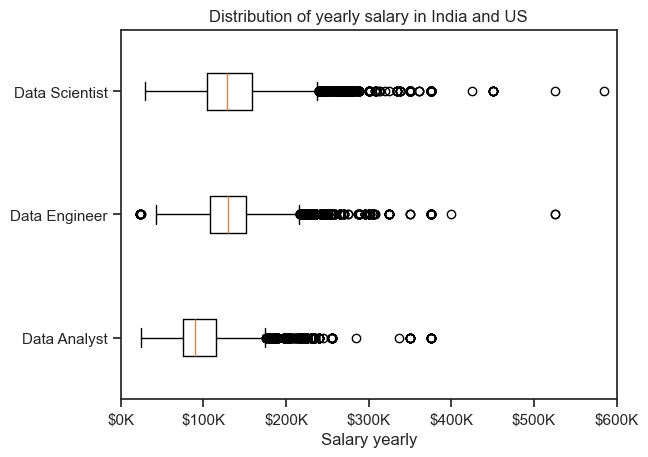

In [34]:
job_list = [df_Ind_US[df_Ind_US['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False) 
plt.title('Distribution of yearly salary in India and US')
plt.xlabel('Salary yearly')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()

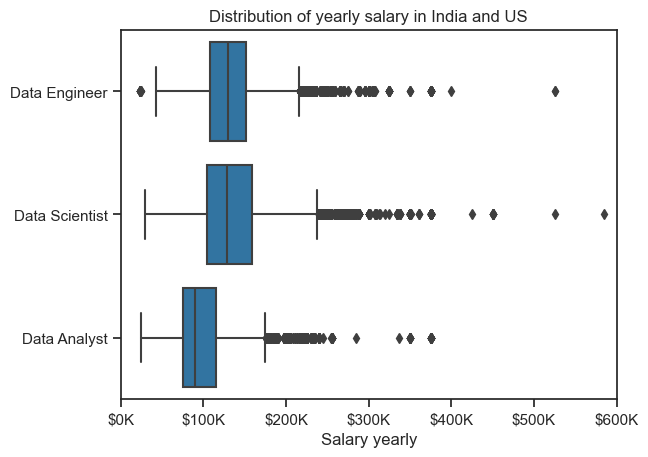

In [40]:
sns.boxplot(data=df_Ind_US, x='salary_year_avg', y='job_title_short', palette=['#1f77b4'])
sns.set_theme(style='ticks')
plt.title('Distribution of yearly salary in India and US')
plt.xlabel('Salary yearly')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()